# Notebook Instructions
THIS NOTEBOOK IS INCOMPLETE. GOTO "STATE THE RULE BELOW" AND COMPLETE THE MISSING INFORMATION
<i>You can run the notebook document sequentially (one cell at a time) by pressing <b> shift + enter</b>. While a cell is running, a [*] will display on the left. When it has been run, a number will display indicating the order in which it was run in the notebook [8].</i>

<i>Enter edit mode by pressing <b>`Enter`</b> or using the mouse to click on a cell's editor area. Edit mode is indicated by a green cell border and a prompt showing in the editor area.</i>

# Regression Tree

A regression tree automatically selects important predictors and suggests trading rules. In this notebook, we will learn to create a regression tree using Apple Inc. stock. The predictor variables are one-day returns, five-day returns, five-day standard deviation and so on. The target variable is one-day future return. The tree we create will help us create trading rules for when the future return is expected to be positive or negative.
<BR>

<B>Create a regression tree</B>
1. Import the data
1. Define predictor variables and a target variable
2. Split the data into train and test dataset
3. Create a regression tree model using the train data
4. Visualize the model

<B>Analyzing the performance</B><BR><BR>
Part I: Single leaf
1. Trading rule based on one leaf node with the highest expected value of a target variable
5. Compute performance in the train and test dataset

Part II: Full tree
1. Trading rule based on all the leaf node
5. Compute the performance in the train and test dataset

### Import the data

In [1]:
import pandas as pd
data = pd.read_csv('AAPL.csv', index_col=0)
data.index = pd.to_datetime(data.index)
data.tail(3)

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2018-04-11,172.23,173.9232,171.70,172.44,22431640.0,0.0,1.0,171.565897,173.252569,171.037941,171.775088,22431640.0
2018-04-12,173.41,175.0000,173.04,174.14,22889285.0,0.0,1.0,172.741347,174.325217,172.372774,173.468533,22889285.0
2018-04-13,174.78,175.8400,173.85,174.73,25124255.0,0.0,1.0,174.106065,175.161978,173.179651,174.056258,25124255.0


### Define predictor variables and a target variable

We define a list of predictors from which the model will pick the best predictors. ret1 is the one-day returns, std5 is the five-day standard deviation and so on. <BR>

<font color='blue'>pct_change()</font> computes the percentage change from the immediately previous row by default and <font color='blue'>rolling_sum(window=n)</font> computes the sum of previous n rows. 

In [2]:
# Returns
data['ret1'] = data.Adj_Close.pct_change()

#data['ret5'] = pd.rolling_sum(data.ret1, 5)
#data['ret10'] = pd.rolling_sum(data.ret1, 10)
#data['ret20'] = pd.rolling_sum(data.ret1, 20)
#data['ret40'] = pd.rolling_sum(data.ret1, 40)

data['ret5'] = data.ret1.rolling(5).sum()
data['ret10'] = data.ret1.rolling(10).sum()
data['ret20'] = data.ret1.rolling(20).sum()
data['ret40'] = data.ret1.rolling(40).sum()

# Standard Deviation
#data['std5'] = pd.rolling_std(data.ret1, 5)
#data['std10'] = pd.rolling_std(data.ret1, 10)
#data['std20'] = pd.rolling_std(data.ret1, 20)
#data['std40'] = pd.rolling_std(data.ret1, 40)

data['std5'] = data.ret1.rolling(5).std()
data['std10'] = data.ret1.rolling(10).std()
data['std20'] = data.ret1.rolling(20).std()
data['std40'] = data.ret1.rolling(40).std()

We define the target variable which is the future one-day returns of the Apple Inc. stock. <BR>
<font color='blue'>shift(periods=n)</font> shifts the values by n period(s). If the value of n is negative then, it shifts the values backward and vice-versa.

In [3]:
data['retFut1'] = data.ret1.shift(-1)

We drop the NaN values and store the predictor variables in X and target variable in y.

In [4]:
data = data.dropna()
predictor_list = ['ret1','ret5', 'ret10', 'ret20', 'ret40', 'std5', 'std10', 'std20', 'std40','Volume']
X = data[predictor_list]
y = data.retFut1
X.head()

,ret1,ret5,ret10,ret20,ret40,std5,std10,std20,std40,Volume
Date,,,,,,,,,,
2008-02-29,-0.037641,0.048274,-0.015692,-0.071285,-0.418026,0.036048,0.028540,0.029106,0.034167,44838600.0
2008-03-03,-0.026316,0.019614,-0.019805,-0.085707,-0.444804,0.039604,0.028898,0.029499,0.034210,56894400.0
2008-03-04,0.023741,0.048283,0.023595,-0.046265,-0.344727,0.040075,0.029205,0.030010,0.032955,63763700.0
2008-03-05,-0.001044,0.015262,0.009128,-0.029914,-0.332386,0.038152,0.028954,0.029799,0.032967,43637000.0
2008-03-06,-0.028596,-0.069856,-0.001054,-0.001615,-0.325010,0.025079,0.029873,0.027623,0.032829,52632100.0


In [5]:
y.head()

Date
2008-02-29   -0.026316
2008-03-03    0.023741
2008-03-04   -0.001044
2008-03-05   -0.028596
2008-03-06    0.010915
Name: retFut1, dtype: float64

### Split the data into train and test dataset
This step is required to verify if the regression tree model we created is any good. We will split the dataset into two parts, first 80% of the dataset will use to create the model and the remaining 20% will be used as a test dataset.

In [6]:
train_length = int(len(data)*0.80)

X_train = X[:train_length] 
X_test =  X[train_length:]
y_train = y[:train_length]
y_test = y[train_length:]                   

We have training data in the X_train and y_train for creating the regression tree model and a X_test and y_test to verify the model on unseen data.

### Create regression tree model

We have used DecisionTreeRegressor from sklearn.tree to create the regression tree model. We choose to set min_samples_leaf to 400, but you are free to experiment with other values and see what is optimal on the train dataset. Generally, a leaf size should not be too small to avoid overfitting in the train dataset.

In [7]:
# Regression tree model
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=1,min_samples_leaf = 400)

We create the regression tree model using fit() method on the train dataset.

In [8]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=400,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [9]:
# Uncomment below line to see details of DecisionTreeRegressor
#help(DecisionTreeRegressor)

### Visualize the model

We now visualize the regression tree created in the below step using the graphviz and sklearn's tree package.

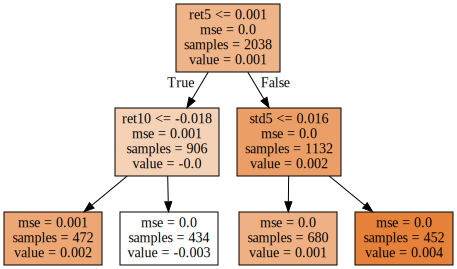

In [10]:
import os
#os.environ["PATH"] += os.pathsep + 'C:/Users/academy/Documents/graphviz-2.38/release/bin/'
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/release/bin/'
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
    
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dtr, 
                                out_file=None, 
                                filled=True,   
                                feature_names=predictor_list)  
graphviz.Source(dot_data)  

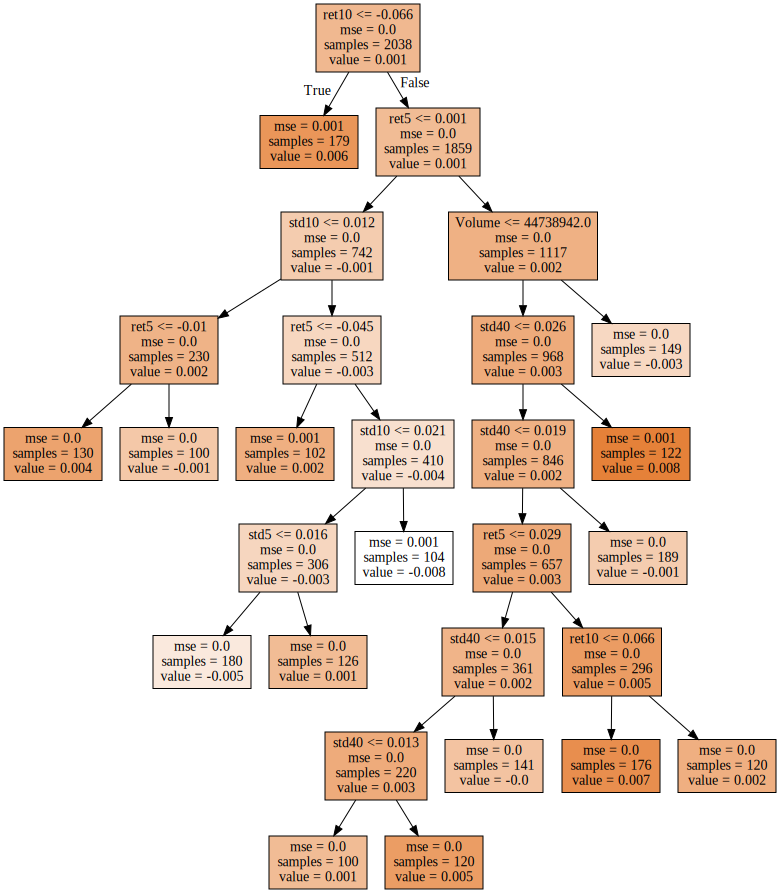

In [11]:
# min_samples_leaf= 100
dtr = DecisionTreeRegressor(random_state=1,min_samples_leaf = 100)
dtr.fit(X_train, y_train)
dot_data = tree.export_graphviz(dtr, 
                                out_file=None, 
                                filled=True,   
                                feature_names=predictor_list)  
graphviz.Source(dot_data)  

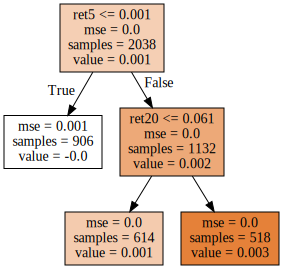

In [12]:
# min_samples_leaf= 500
dtr = DecisionTreeRegressor(random_state=1,min_samples_leaf = 500)
dtr.fit(X_train, y_train)

dot_data = tree.export_graphviz(dtr, 
                                out_file=None, 
                                filled=True,   
                                feature_names=predictor_list)  
graphviz.Source(dot_data)  

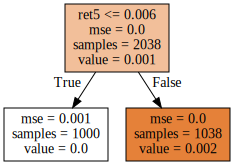

In [13]:
# min_samples_leaf= 1000
dtr = DecisionTreeRegressor(random_state=1,min_samples_leaf = 1000)
dtr.fit(X_train, y_train)

dot_data = tree.export_graphviz(dtr, 
                                out_file=None, 
                                filled=True,   
                                feature_names=predictor_list)  
graphviz.Source(dot_data)  

To practice, create a regression tree model with min_samples_leaf as 100, 500 and 1000 and plot the tree to visualize the difference.

###  <font color='red'> For small sample sizes we will experince OVERFITTING and 
###  <font color='red'> For large sample size we will experience UNDERFITTING

CONTINUING WITH OUR MODEL WITH MIN_SAMPLES_LEAF = 400

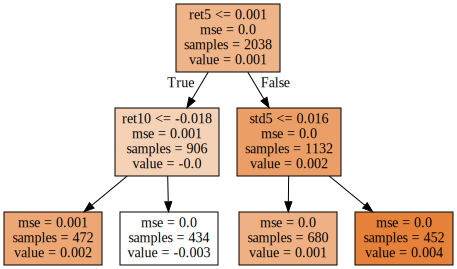

In [14]:
# Decision tree with min_samples_leaf= 400
dtr = DecisionTreeRegressor(min_samples_leaf = 400)
dtr.fit(X_train, y_train)
dot_data = tree.export_graphviz(dtr, 
                                out_file=None, 
                                filled=True,   
                                feature_names=predictor_list)  
graphviz.Source(dot_data)  

### Trading rule based on the leaf node with the highest target variable value

The above tree can be used to define a long rule. The rule can be paraphrased as when cond1 and cond2 then buy, else do not buy. So predicted_signal is '1' when buy and '0' otherwise. STATE THE RULE BELOW.

In [15]:
import numpy as np
data['predicted_signal'] = np.where(((data.ret5 > 0.001) & (data.std5 > 0.016)), 1, 0)


# Visualizing the signal predicted for last 10 days
import matplotlib.pyplot as plt
import seaborn
data.predicted_signal[-10:].plot()
plt.show()

<Figure size 640x480 with 1 Axes>

---------------------------------------------------------
### <font color='red'>ANSWER
#### data.ret5 > 0.001 & data.std5 > 0.016 is that condition
---------------------------------------------------------

The above graph shows the signal predicted for last 10 days. The strategy returns are generated by multiplying the future returns by the predicted signal and stored in the strategy_returns.

In [16]:
data['strategy_returns_single_leaf'] = data.retFut1 * data.predicted_signal

### Trading rule based on the full tree

We define a trading rule based on the expected response of every single leaf. If the expected value is positive then we buy the Apple Inc. stock and otherwise, we sell the stock. STATE THE RULE BELOW

In [17]:
data['predicted_signal'] = np.where(dtr.predict(X) > 0, 1,-1)
data['strategy_returns_full_tree'] = data.retFut1 * data.predicted_signal

-----------------------------------------------
### <font color='red'>ANSWER
#### model.predict (X) > 0 (if true = 1, if false = -1)
-----------------------------------------------

### Performance computation for single leaf

Sharpe Ratio

The Sharpe ratio is calculated as follows:

<img src="https://d2a032ejo53cab.cloudfront.net/Glossary/R2TAJa6K/Sharpe-1.jpg"></img>

Where
- N is the number of trading days in a year
- Rf is the risk-free rate
- Std dev is the standard deviation

Sharpe ratio represents how good the strategy performance is for the risk (standard deviation) taken to achieve it. The higher the Sharpe ratio the better is the strategy. Generally, a Sharpe ratio of greater than 1.5 is preferred.

In [18]:
# The below function returns the Sharpe ratio for the excess returns (Strategy returns - Risk free rate) passed to it.
def annualized_sharpe_ratio(returns, N=252):
    return np.sqrt(N) * returns.mean() / returns.std()

We calculate the Sharpe ratio for the strategy in train and test dataset. The risk-free rate is assumed to be 5% p.a.

In [19]:
# Sharpe ratio
# Train dataset
data['excess_daily_strategy_return'] = data.strategy_returns_single_leaf - 0.05/252
sharpe_train_single_leaf = annualized_sharpe_ratio(data.excess_daily_strategy_return.iloc[:train_length])
# Test dataset
sharpe_test_single_leaf = annualized_sharpe_ratio(data.excess_daily_strategy_return.iloc[train_length:])

print("Single-leaf Sharpe Ratio- Training data : ",sharpe_train_single_leaf)
print("Single-leaf Sharpe Ratio- Test data : ",sharpe_test_single_leaf)

Single-leaf Sharpe Ratio- Training data :  0.8166862313864148
Single-leaf Sharpe Ratio- Test data :  1.8971686928417455


### Strategy CAGR
CAGR represents the compounded annual returns of the strategy. The strategy CAGR is computed as follows:

<i>(Cumulative returns + 1)^(252/number of days) - 1</i>

where cumulative returns are the total strategy returns and number of days represent the total trading days.

In [20]:
def CAGR(returns):
    cumulative_returns = returns.cumsum().iloc[-1]
    period_in_days = len(returns)
    return 100*((cumulative_returns+1)**(252.0/period_in_days)-1)

In [21]:
# Single Leaf
# Train dataset
ret_train_single_leaf = CAGR(data.strategy_returns_single_leaf.iloc[:train_length])
# Test dataset
ret_test_single_leaf = CAGR(data.strategy_returns_single_leaf.iloc[train_length:])

print("Single-leaf CAGR- Training data : ",ret_train_single_leaf)
print("Single-leaf CAGR- Test data : ",ret_test_single_leaf)

Single-leaf CAGR- Training data :  11.978401197952703
Single-leaf CAGR- Test data :  16.329384729063577


### Performance computation for full tree

In [22]:
# Full Tree

# Sharpe ratio
# Train dataset
data['excess_daily_strategy_return'] = data.strategy_returns_full_tree - 0.05/252
sharpe_train_full_tree = annualized_sharpe_ratio(data.excess_daily_strategy_return.iloc[:train_length])
# Test dataset
sharpe_test_full_tree = annualized_sharpe_ratio(data.excess_daily_strategy_return.iloc[train_length:])

print("Full tree Sharpe Ratio- Training data : ",sharpe_train_full_tree)
print("Full tree Sharpe Ratio- Test data : ",sharpe_test_full_tree)

# CAGR
# Train dataset
ret_train_full_tree = CAGR(data.strategy_returns_full_tree.iloc[:train_length])
# Test dataset
ret_test_full_tree = CAGR(data.strategy_returns_full_tree.iloc[train_length:])


print("Full tree CAGR- Training data : ",ret_train_full_tree)
print("Full tree CAGR- Test data : ",ret_test_full_tree)


Full tree Sharpe Ratio- Training data :  1.582702197211522
Full tree Sharpe Ratio- Test data :  0.5253108919395207
Full tree CAGR- Training data :  23.601038678395202
Full tree CAGR- Test data :  14.54245657464417


### Performance Comparision of single leaf and full tree

Cumulative returns in train dataset.

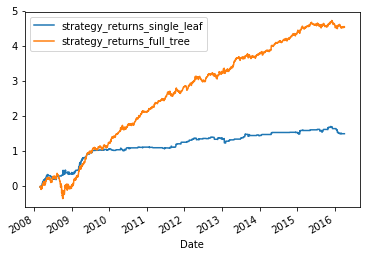

In [23]:
# Plot the cumulative returns for single leaf in train dataset
data.strategy_returns_single_leaf[:train_length].cumsum().plot()

# Plot the cumulative returns for full tree in train dataset
data.strategy_returns_full_tree[:train_length].cumsum().plot()

# Show the legend
plt.legend()

# Show the graph
plt.show()

Cumulative returns in the test dataset.

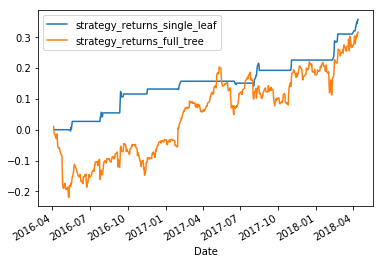

In [24]:
# Plot the cumulative returns for single leaf in train dataset
data.strategy_returns_single_leaf[train_length:].cumsum().plot()

# Plot the cumulative returns for full tree in train dataset
data.strategy_returns_full_tree[train_length:].cumsum().plot()

# Show the legend
plt.legend()

# Show the graph
plt.show()

In [25]:
from tabulate import tabulate

# Tabulate the performance in train and test dataset for single leaf and full tree
print (tabulate(
        [             
            ['CAGR', ret_train_single_leaf, ret_train_full_tree, ret_test_single_leaf, ret_test_full_tree],
            ['Sharpe Ratio', sharpe_train_single_leaf, sharpe_train_full_tree, sharpe_test_single_leaf, sharpe_test_full_tree],
        ], 
        headers=['Train (Single Leaf)', 'Train (Full Tree)', 'Test (Single Leaf)',  'Test (Full Tree)'], 
    tablefmt='orgtbl'))

|              |   Train (Single Leaf) |   Train (Full Tree) |   Test (Single Leaf) |   Test (Full Tree) |
|--------------+-----------------------+---------------------+----------------------+--------------------|
| CAGR         |             11.9784   |             23.601  |             16.3294  |          14.5425   |
| Sharpe Ratio |              0.816686 |              1.5827 |              1.89717 |           0.525311 |


 In the next section, we will explore some ensemble techniques for reducing overfitting so that we can, in fact, use all leaves for prediction.
<BR>

## APPENDIX

### GRID SEARCH FOR MIN_SAMPLE_LEAF

###  <font color='red'>To find the optimal sample size, the GridSearCV is been used in the following part</font> 

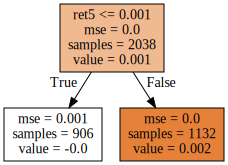

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {"min_samples_leaf":[50, 100, 200, 300, 400, 500, 650,850,1000]}
regressorTreeCV = GridSearchCV(DecisionTreeRegressor(random_state=1), param_grid, cv=5)
regressorTreeCV.fit(X_train, y_train)
dtr = regressorTreeCV.best_estimator_
dot_data = tree.export_graphviz(dtr, 
                                out_file=None, 
                                filled=True,   
                                feature_names=predictor_list)  
graphviz.Source(dot_data)  

In [27]:
regressorTreeCV.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=850,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

USING GRID SEARCH, we get the best min_sample_leaf = 850 as the arg max

#### USING STD5> 0.0155, IT RESULTS IN HIGHER SHARPE RATIO. CODE AND THE OUTPUT FOR YOUR REFERENCE IS SHOWN BELOW

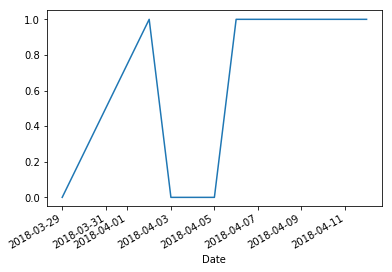

In [28]:
import numpy as np
data['predicted_signal'] = np.where(((data.ret5 > 0.001) & (data.std5 > 0.0155)), 1, 0)


# Visualizing the signal predicted for last 10 days
import matplotlib.pyplot as plt
import seaborn
data.predicted_signal[-10:].plot()
plt.show()

In [29]:
data['strategy_returns_single_leaf'] = data.retFut1 * data.predicted_signal

In [30]:
data['predicted_signal'] = np.where(dtr.predict(X) > 0, 1,-1)
data['strategy_returns_full_tree'] = data.retFut1 * data.predicted_signal

In [31]:
# The below function returns the Sharpe ratio for the excess returns (Strategy returns - Risk free rate) passed to it.
def annualized_sharpe_ratio(returns, N=252):
    return np.sqrt(N) * returns.mean() / returns.std()

In [32]:
# Sharpe ratio
# Train dataset
data['excess_daily_strategy_return'] = data.strategy_returns_single_leaf - 0.05/252
sharpe_train_single_leaf = annualized_sharpe_ratio(data.excess_daily_strategy_return.iloc[:train_length])
# Test dataset
sharpe_test_single_leaf = annualized_sharpe_ratio(data.excess_daily_strategy_return.iloc[train_length:])

print("Single-leaf Sharpe Ratio- Training data : ",sharpe_train_single_leaf)
print("Single-leaf Sharpe Ratio- Test data : ",sharpe_test_single_leaf)

Single-leaf Sharpe Ratio- Training data :  0.9428705964564625
Single-leaf Sharpe Ratio- Test data :  2.102552757814452


In [33]:
def CAGR(returns):
    cumulative_returns = returns.cumsum().iloc[-1]
    period_in_days = len(returns)
    return 100*((cumulative_returns+1)**(252.0/period_in_days)-1)

In [34]:
# Single Leaf
# Train dataset
ret_train_single_leaf = CAGR(data.strategy_returns_single_leaf.iloc[:train_length])
# Test dataset
ret_test_single_leaf = CAGR(data.strategy_returns_single_leaf.iloc[train_length:])

print("Single-leaf CAGR- Training data : ",ret_train_single_leaf)
print("Single-leaf CAGR- Test data : ",ret_test_single_leaf)

Single-leaf CAGR- Training data :  12.972373696980256
Single-leaf CAGR- Test data :  17.959795640920095


In [35]:
# Full Tree

# Sharpe ratio
# Train dataset
data['excess_daily_strategy_return'] = data.strategy_returns_full_tree - 0.05/252
sharpe_train_full_tree = annualized_sharpe_ratio(data.excess_daily_strategy_return.iloc[:train_length])
# Test dataset
sharpe_test_full_tree = annualized_sharpe_ratio(data.excess_daily_strategy_return.iloc[train_length:])

print("Full tree Sharpe Ratio- Training data : ",sharpe_train_full_tree)
print("Full tree Sharpe Ratio- Test data : ",sharpe_test_full_tree)

# CAGR
# Train dataset
ret_train_full_tree = CAGR(data.strategy_returns_full_tree.iloc[:train_length])
# Test dataset
ret_test_full_tree = CAGR(data.strategy_returns_full_tree.iloc[train_length:])


print("Full tree CAGR- Training data : ",ret_train_full_tree)
print("Full tree CAGR- Test data : ",ret_test_full_tree)


Full tree Sharpe Ratio- Training data :  0.9259157174311076
Full tree Sharpe Ratio- Test data :  1.1915422225729035
Full tree CAGR- Training data :  18.092808566907117
Full tree CAGR- Test data :  25.656731557839187


In [36]:
from tabulate import tabulate

# Tabulate the performance in train and test dataset for single leaf and full tree
print (tabulate(
        [             
            ['CAGR', ret_train_single_leaf, ret_train_full_tree, ret_test_single_leaf, ret_test_full_tree],
            ['Sharpe Ratio', sharpe_train_single_leaf, sharpe_train_full_tree, sharpe_test_single_leaf, sharpe_test_full_tree],
        ], 
        headers=['Train (Single Leaf)', 'Train (Full Tree)', 'Test (Single Leaf)',  'Test (Full Tree)'], 
    tablefmt='orgtbl'))

|              |   Train (Single Leaf) |   Train (Full Tree) |   Test (Single Leaf) |   Test (Full Tree) |
|--------------+-----------------------+---------------------+----------------------+--------------------|
| CAGR         |             12.9724   |           18.0928   |             17.9598  |           25.6567  |
| Sharpe Ratio |              0.942871 |            0.925916 |              2.10255 |            1.19154 |


##### WE CAN SEE THAT CHANGING THE VALUE FROM 0.016 TO 0.0155, SHARPE RATIO HAS INCREASD FROM 1.89 TO 2.10 AS WELL AS CAGR FROM 16.32 TO 17.959

##### HENCE, SMALL CHANGE IN THESE VALUES HAVE A SUBSTANTIAL IMPACT ON THE MEASURES